___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part -1<br><br>Univariate Time Series Forecasting with RNN<br><br>RSCCASN<br><h1>

# Data Info

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data¶

In [70]:
df = pd.read_csv('RSCCASN.csv',
                index_col='DATE',
                parse_dates=True
                )

In [71]:
#parse_dates = True yazmazsak indexi datetime gormez

In [72]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [74]:
df.columns = ['Sales']

In [75]:
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


<AxesSubplot:xlabel='DATE'>

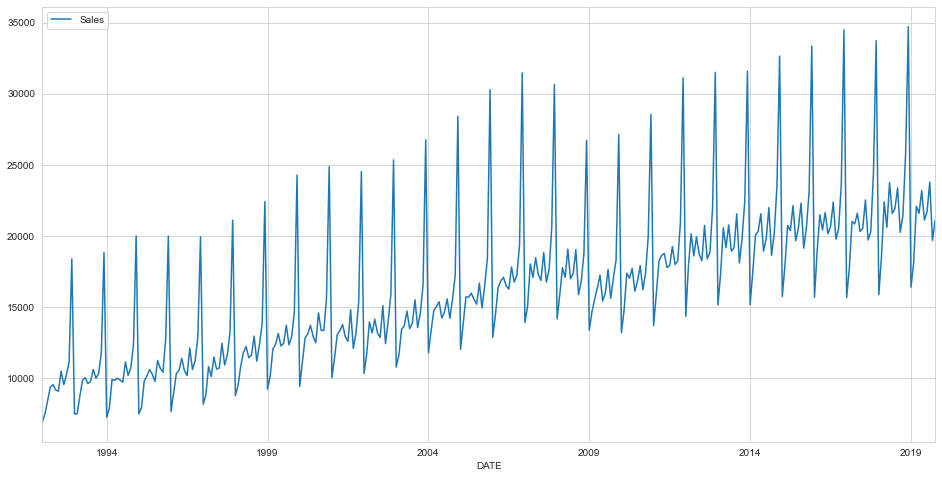

In [76]:
df.plot(figsize=(16,8))

In [77]:
#onumuzdeki 12 ayda nasil bir satis olacak predict edecegiz

# Preprocessing of Data

## Train Test Split

In [78]:
len(df)

334

In [79]:
test_size = 24

In [80]:
test_ind = len(df)- test_size
test_ind

310

In [81]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [82]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-06-01,20322
2017-07-01,20535
2017-08-01,22536


In [83]:
test

,Sales
DATE,
2017-11-01,24438
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585
2018-03-01,22404
2018-04-01,20616
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919


## Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [87]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [88]:
# help(TimeseriesGenerator)

In [89]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [90]:
#length season 12 aylik data

In [91]:
len(generator)

298

In [92]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [93]:
X, y = generator[0]

In [94]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


# Modelling

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [96]:
train_scaled.shape

(310, 1)

In [97]:
n_features = train_scaled.shape[1]

In [98]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [99]:
#bir sonraki layer LSTM ise return sequence diyoruz

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [101]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [102]:
4 * ((100+1)*50+(50**2))

30200

## EarlyStopping and Validation Generator

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

In [104]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [105]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [106]:
len(validation_generator)

12

In [107]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
298/298 [==============================] - 7s 11ms/step - loss: 0.0229 - val_loss: 0.0251
Epoch 2/120
298/298 [==============================] - 3s 8ms/step - loss: 0.0190 - val_loss: 0.0252
Epoch 3/120
298/298 [==============================] - 3s 10ms/step - loss: 0.0172 - val_loss: 0.0294
Epoch 4/120
298/298 [==============================] - 3s 9ms/step - loss: 0.0174 - val_loss: 0.0308
Epoch 5/120
298/298 [==============================] - 3s 9ms/step - loss: 0.0166 - val_loss: 0.0308
Epoch 6/120
298/298 [==============================] - 3s 9ms/step - loss: 0.0170 - val_loss: 0.0297


<AxesSubplot:>

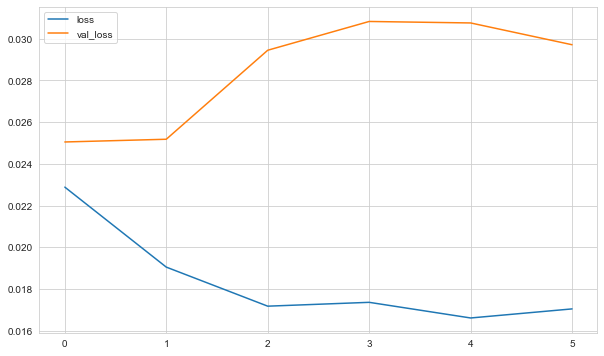

In [108]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# Evaluation on Test Data

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [110]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [111]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 20ms/step


In [112]:
predictions_scaled

[array([0.5276336], dtype=float32),
 array([0.51691586], dtype=float32),
 array([0.4727671], dtype=float32),
 array([0.49046308], dtype=float32),
 array([0.50009453], dtype=float32),
 array([0.49866018], dtype=float32),
 array([0.49774212], dtype=float32),
 array([0.4944048], dtype=float32),
 array([0.4951806], dtype=float32),
 array([0.49511945], dtype=float32),
 array([0.4886786], dtype=float32),
 array([0.4913629], dtype=float32)]

In [113]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -0.04445564421158821 
mae: 0.09873952744864971 
mse: 0.023132003509567334 
rmse: 0.15209208891184095


## Inverse Transformation and Comparing

In [114]:
predictions = scaler.inverse_transform(predictions_scaled)

In [115]:
compare = test[:12]

In [116]:
compare['Predictions'] = predictions

In [117]:
compare

,Sales,Predictions
DATE,,
2017-11-01,24438,21471.140
2017-12-01,33720,21175.930
2018-01-01,15881,19959.897
2018-02-01,18585,20447.315
2018-03-01,22404,20712.604
2018-04-01,20616,20673.096
2018-05-01,23764,20647.809
2018-06-01,21589,20555.886
2018-07-01,21919,20577.255


<AxesSubplot:xlabel='DATE'>

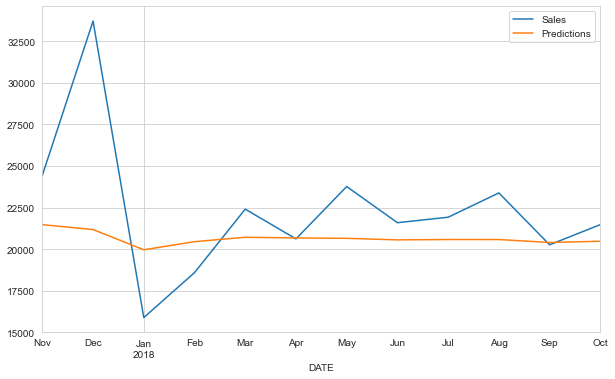

In [118]:
compare.plot()

In [119]:
eval_metrics(compare.Sales, compare.Predictions)

r2_score: -0.044455644211588874 
mae: 2719.6815440456085 
mse: 17549601.886162255 
rmse: 4189.224496987748


# Retrain and Forecasting

In [120]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [121]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [122]:
len(df)

334

In [123]:
len(generator)
#length 12 oldugu icin

322

In [124]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
322/322 [==============================] - 6s 8ms/step - loss: 0.0213
Epoch 2/15
322/322 [==============================] - 3s 8ms/step - loss: 0.0200
Epoch 3/15
322/322 [==============================] - 3s 8ms/step - loss: 0.0183
Epoch 4/15
322/322 [==============================] - 3s 8ms/step - loss: 0.0189
Epoch 5/15
322/322 [==============================] - 3s 8ms/step - loss: 0.0167
Epoch 6/15
322/322 [==============================] - 3s 8ms/step - loss: 0.0158
Epoch 7/15
322/322 [==============================] - 3s 8ms/step - loss: 0.0148
Epoch 8/15
322/322 [==============================] - 3s 9ms/step - loss: 0.0134
Epoch 9/15
322/322 [==============================] - 3s 10ms/step - loss: 0.0129
Epoch 10/15
322/322 [==============================] - 3s 9ms/step - loss: 0.0095
Epoch 11/15
322/322 [==============================] - 3s 8ms/step - loss: 0.0082
Epoch 12/15
322/322 [==============================] - 3s 8ms/step - loss: 0.0073
Epoch 13/15
322/322 [===

In [125]:
scaled_full_data.shape

(334, 1)

In [126]:
scaled_full_data[-length:].shape

(12, 1)

In [127]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 20ms/step


In [128]:
forecast = scaler.inverse_transform(forecast)

In [129]:
forecast

array([[23433.11053705],
       [26153.01637745],
       [17517.73303652],
       [18551.65404105],
       [19795.73468518],
       [19711.40207481],
       [20084.66878939],
       [19361.70022368],
       [19681.92855191],
       [19943.35512924],
       [18668.02048397],
       [19452.57849264]])

In [130]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [131]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [132]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [133]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [134]:
forecast_df

,Forecast
2019-11-01,23433.111
2019-12-01,26153.016
2020-01-01,17517.733
2020-02-01,18551.654
2020-03-01,19795.735
2020-04-01,19711.402
2020-05-01,20084.669
2020-06-01,19361.700
2020-07-01,19681.929
2020-08-01,19943.355


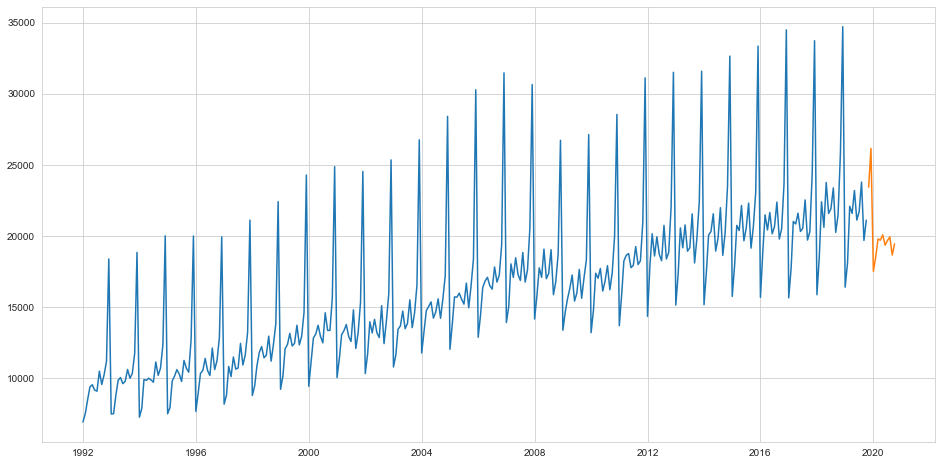

In [135]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

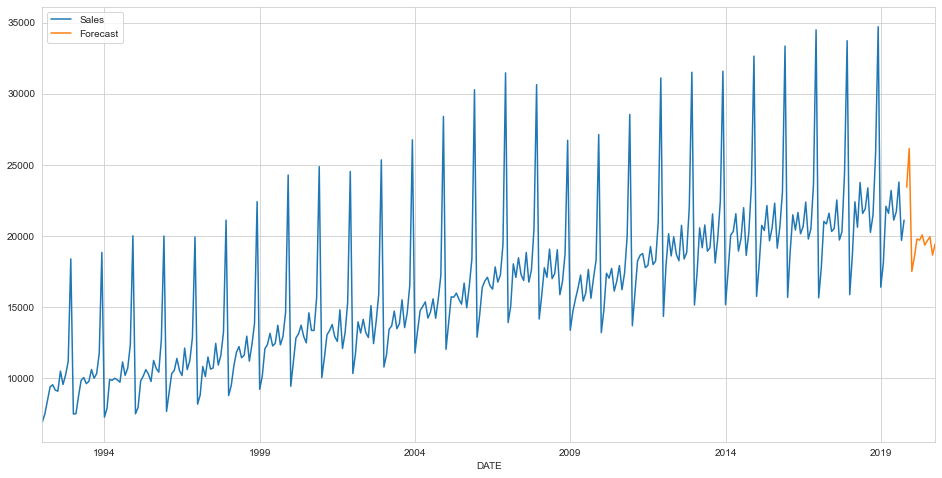

In [136]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

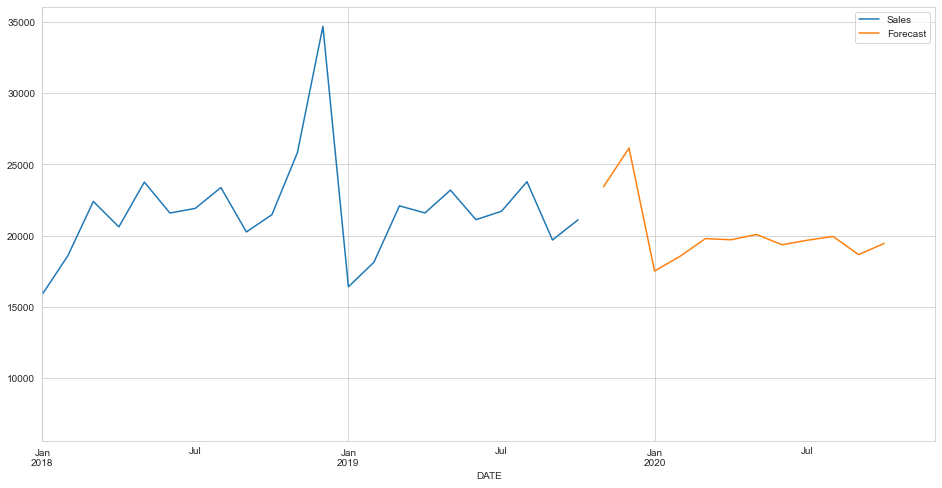

In [137]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

In [138]:
dataset_total = pd.concat((df['Sales'], forecast_df['Forecast']), axis=0)

<AxesSubplot:>

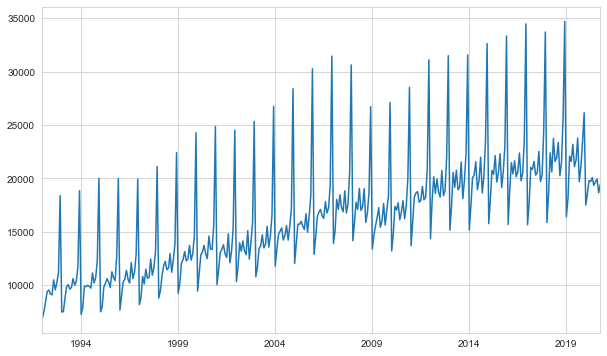

In [139]:
dataset_total.plot()

In [141]:
#bu data xgboost ile nasil yaplir

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___